# Interest Theory

Interest theory functions, that are in common actuarial and financial use, are reviewed.  Interest rates are generally assumed to be fixed and constant.

## Interest rates

$i$ is the amount earned on \$1 after one year

- effective annual _interest rate_

$i^{(m)}$ is the nominal interest rate compounded _m_ times per year

- it is numerically equal to $m$ times the effective interest rate over 1/m'th of a year.

$d = \dfrac{i}{1 + i}$

- annual _discount rate_ of interest

$d^{(m)}$ is the nominal discount rate compounded _m_ times per year

- it is numerically equal to $m$ times the discount rate over 1/m'th of a year.

$v = \dfrac{1}{1 + i}$

- annual _discount factor_

$\delta = \log(1+i)$

- _continuosly-compounded rate_ of interest, or _force of interest per year_




__Relationships between interest rates__

$$
\begin{align*}
v^{t} & = e^{- \delta t} \\
& = (1-d)^{t} \\
& = (1+i)^{-t} \\
& = (1-\dfrac{d^{(m)}}{m})^{mt} \\
& = (1+\dfrac{i^{(m)}}{m})^{-mt} \\
\end{align*}
$$



__Doubling the force of interest__

Note that doubling the force of interest is not the same as doubling the rate of interest.

$~^2\delta \leftarrow 2 \delta$

$~^2i \leftarrow 2 i + i^2$

$~^2d \leftarrow 2 d - d^2$

$~^2v \leftarrow v^2$



__Annuity certain__

Present value of an annuity certain that pays at a rate of \$1 per year for $n$ years

$\ddot{a}_{\overline{n|}} = \dfrac{1 - v^{n}}{d}$

- Annuity certain due: pays $1 at the beginning of the year 

$a_{\overline{n|}} = \dfrac{1 - v^{n}}{i} = \ddot{a}_{\overline{n+1|}} - 1$

- Immediate annuity certain: pays $1 at the end of the year

$\overline{a}_{\overline{n|}}  = \dfrac{1 - v^{n}}{\delta}$

- Continuous annuity certain: pays at a rate of $1 per year continuously.

## Methods

The ``Interest`` class implements methods to convert between nominal, discount, continuously-compounded and 1/m'thy rates of interest, and compute the value of an annuity certain.

In [1]:
from actuarialmath import Interest
import describe
describe.methods(Interest)


class Interest - Store an assumed interest rate, and compute interest rate functions
    
    Args:
      i : assumed annual interest rate
      d : or annual discount rate
      v : or annual discount factor
      delta : or continuously compounded interest rate
      v_t : or discount rate as a function of time
      i_m : or m-thly interest rate
      d_m : or m-thly discount rate
      m : m'thly frequency, if i_m or d_m are specified

    Methods:
    --------

    annuity(t, m, due):
      Compute value of the annuity certain factor

    mthly(m, i, d, i_m, d_m):
      Convert to or from m'thly interest rates

    double_force(i, delta, d, v):
      Double the force of interest




## Examples


The `Interest` class can be initialized with an assumed annual interest rate expressed in any one of the forms `i, d, v, delta, i_m, d_m` (where the latter two forms also require the argument `m` to specify the number of times compounded in a year). Then that rate can be retrieved in any other annual form as an attribute.

In [2]:
interest = Interest(i=0.05)
print(interest.d, interest.v, interest.delta, interest.i)

0.047619047619047616 0.9523809523809523 0.04879016416943205 0.05


The `mthly` static method converts between annual-pay and m-thly pay interest rates in any form.

In [3]:
delta = 0.05
i = Interest(delta=delta).i      # convert to annual interest rate
d = Interest(delta=delta).d      # convert to annual discount rate
i_m = Interest.mthly(i=i, m=12)  # convert to annual interest rate monthly-pay
d_m = Interest.mthly(d=d, m=12)  # convert to annual discount rate monthly-pay
print('Continuously-compounded annual rate of interest:', delta)
print('  Convert to annual interest rate:              ', i, Interest.mthly(i_m=i_m, m=12))
print('  Convert to annual discount rate:              ', d, Interest.mthly(d_m=d_m, m=12))
print('  Convert to annual interest rate (monthly-pay):', i_m)
print('  Convert to annual discount rate (monthly-pay):', d_m)


Continuously-compounded annual rate of interest: 0.05
  Convert to annual interest rate:               0.05127109637602412 0.051271096376023007
  Convert to annual discount rate:               0.04877057549928606 0.04877057549928587
  Convert to annual interest rate (monthly-pay): 0.05010431149342143
  Convert to annual discount rate (monthly-pay): 0.049895977858680496


The `annuity` class method computes the present value of an annuity that pays at the rate of $1 per year continuously or discrete (due, immediate, or m'thly)

Annuity Factors By Payment Frequency (perpetual, i=5%):
1. Immediate:                  19.999999999999982
2. Immediate (quarterly pay):  20.371188429095998
3. Continuous:                 20.49593431428785
4. Due (quarterly pay):        20.621188429096076
5. Due:                        20.999999999999975


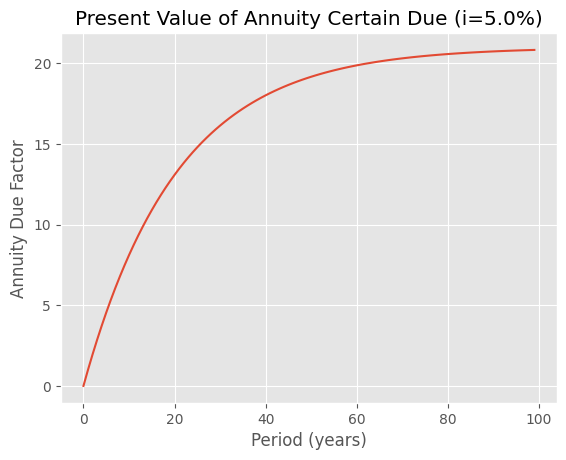

In [4]:
import matplotlib.pyplot as plt
t = range(100)
plt.plot(t, [interest.annuity(t=s, due=True) for s in t])
plt.title(f'Present Value of Annuity Certain Due (i={interest.i * 100}%)')
plt.xlabel('Period (years)')
plt.ylabel('Annuity Due Factor')
print("Annuity Factors By Payment Frequency (perpetual, i=5%):")
print('1. Immediate:                 ', interest.annuity(t=Interest.WHOLE, due=False))
print('2. Immediate (quarterly pay): ', interest.annuity(t=Interest.WHOLE, m=4, due=False))
print('3. Continuous:                ', interest.annuity(t=Interest.WHOLE, m=0))
print('4. Due (quarterly pay):       ', interest.annuity(t=Interest.WHOLE, m=4, due=True))
print('5. Due:                       ', interest.annuity(t=Interest.WHOLE, due=True))


The `double_force` static method takes an interest rate in any form, and converts to the same form after doubling the force of interest.

In [5]:
print("Example: double the force of interest i=0.05")
i = 0.05
d = Interest(i=i).d               # convert interest rate to discount rate
print('i:', i, 'd:', d)
i2 = Interest.double_force(i=i)   # interest rate after doubling force
d2 = Interest.double_force(d=d)   # discount rate after doubling force
print('i:', round(i2, 6), round(Interest(d=d2).i, 6))
print('d:', round(d2, 6), round(Interest(i=i2).d, 6))


Example: double the force of interest i=0.05
i: 0.05 d: 0.047619047619047616
i: 0.1025 0.1025
d: 0.092971 0.092971


__SOA Question 3.10__: 

A group of 100 people start a Scissor Usage Support Group. The rate at which members enter and leave the group is dependent on whether they are right-handed or left-handed. You are given the following:
- The initial membership is made up of 75% left-handed members (L) and 25%
right-handed members (R)
- After the group initially forms, 35 new (L) and 15 new (R) join the group at the start of each subsequent year
- Members leave the group only at the end of each year
- $q^L$ = 0.25 for all years
- $q^R$ = 0.50 for all years
Calculate the proportion of the Scissor Usage Support Group’s expected membership that is left-handed at the start of the group’s6 th year, before any new members join for that year.

In [6]:
print("SOA Question 3.10:  (C) 0.86")
interest = Interest(v=0.75)
L = 35 * interest.annuity(t=4, due=False) + 75 * interest.v_t(t=5)
interest = Interest(v=0.5)
R = 15 * interest.annuity(t=4, due=False) + 25 * interest.v_t(t=5)
print(L / (L + R))


SOA Question 3.10:  (C) 0.86
0.8578442833761983
